<h1>Exploring Health Datasets for Link-Health to Determine Association between ACP Eligibility and Health Outcomes</h1>

<h2><b>IMPORTANT:</b><br><span style="color:red;">This product uses the Census Bureau Data API but is not endorsed or certified by the Census Bureau.</span></h2>

In [159]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore') #Turn off warnings

<h2>Cleaning the PLACES Dataset (DO NOT TOUCH)</h2>

places_zcta = pd.read_csv("noah_csv/places_zcta.csv")

places_zcta

In [160]:
ma_acp_adoption = pd.read_csv("noah_csv/MA_ACP_Adoption.csv")
ma_acp_adoption

,City,Adoption Rate,Eligible Households,Enrolled Households,Eligible Unconnected Households
0,Abington,17%,2169,376,448
1,Agawam Town,20%,5414,1069,2213
2,Amesbury Town,26%,1821,477,382
3,Arlington,14%,4816,651,925
4,Attleboro,25%,6110,1525,1392
...,...,...,...,...,...
72,Wilmington,11%,1975,225,403
73,Winchester,9%,1925,182,370
74,Winthrop Town,11%,4462,499,1586
75,Woburn,17%,4790,826,1069


In [161]:
#Adding clean_zip function
clean_zip = lambda zip: str(zip) if zip > 10000 else (f"0{zip}" if zip >= 1000 else f"00{zip}")

<h2>Merging Zip Codes with Towns in the ACP Dataset and PLACES Data</h2>

In [162]:
ma_zips_raw = pd.read_csv("noah_csv/ma_zips.csv")
ma_zips = ma_zips_raw[["Zipcode", "City"]]
ma_zips = ma_zips.rename(columns={"Zipcode":"Zip Code"})
ma_zips

,Zip Code,City
0,1001,Agawam
1,1002,Amherst
2,1003,Amherst
3,1004,Amherst
4,1005,Barre
...,...,...
698,2783,Taunton
699,2790,Westport
700,2791,Westport Point
701,5501,Andover


In [163]:
#Clean Zip Codes
ma_zips["Zip Code"] = ma_zips["Zip Code"].map(clean_zip)
ma_zips

,Zip Code,City
0,01001,Agawam
1,01002,Amherst
2,01003,Amherst
3,01004,Amherst
4,01005,Barre
...,...,...
698,02783,Taunton
699,02790,Westport
700,02791,Westport Point
701,05501,Andover


In [164]:
ma_acp_adoption_zc = ma_acp_adoption.merge(ma_zips, left_on="City", right_on="City")
ma_acp_adoption_zc

,City,Adoption Rate,Eligible Households,Enrolled Households,Eligible Unconnected Households,Zip Code
0,Abington,17%,2169,376,448,02351
1,Arlington,14%,4816,651,925,02474
2,Arlington,14%,4816,651,925,02476
3,Attleboro,25%,6110,1525,1392,02703
4,Belmont,11%,2455,268,471,02478
...,...,...,...,...,...,...
206,Worcester,60%,42567,25455,14501,01614
207,Worcester,60%,42567,25455,14501,01615
208,Worcester,60%,42567,25455,14501,01653
209,Worcester,60%,42567,25455,14501,01654


The problem here is that we have the ACP data on a town level from the superhighway dataset, but the PLACES data is on a ZCTA level meaning we would somehow need to aggregate all the data from different zip codes in the same town in the PLACES dataset, but by population not percent so it is a weighted average

My thoughts:
- Add Town to the PLACES dataset, merging by zip code
- Find a dataset that provides population by ZCTA and merge with PLACES dataset on Zip Code
- Aggregate percent data in the PLACES dataset by population to create a weighted average so the PLACES and ACP datasets would have the same levels of granularity
    - This would certainly screw up the confidence level piece so we would have to drop that
    
Option 2 is to not worry about population and just assume the same adoption rate per different ZCTAs in the same city (like assuming both area 01614 and 01615 separately have a 60% adoption rate) which would likely be a major oversight

<h2>Exporting MA places data separately</h2>
<h4>The full PLACES dataset was too large to upload to GitHub so I exported a separate places_ma dataset which is now in the noah_csv folder</h4>

In [165]:
places_ma = pd.read_csv("noah_csv/places_ma.csv")
places_ma = places_ma.drop(columns=["Unnamed: 0"])
places_ma

,Year,Zip Code,Category,Measure,Data_Value_Type,Data_Value,Confidence Interval
0,2020,1005,Health Outcomes,Arthritis among adults aged >=18 years,Crude prevalence,27.2,"(25.8, 28.6)"
1,2020,1007,Health Outcomes,Stroke among adults aged >=18 years,Crude prevalence,2.1,"(1.9, 2.4)"
2,2020,1008,Health Outcomes,Obesity among adults aged >=18 years,Crude prevalence,29.2,"(27.9, 30.5)"
3,2020,1009,Health Outcomes,Obesity among adults aged >=18 years,Crude prevalence,29.7,"(28.0, 31.5)"
4,2020,1026,Health Outcomes,Chronic kidney disease among adults aged >=18 ...,Crude prevalence,2.8,"(2.6, 3.0)"
...,...,...,...,...,...,...,...
15939,2020,1057,Health Risk Behaviors,Current smoking among adults aged >=18 years,Crude prevalence,15.4,"(13.5, 17.2)"
15940,2020,1833,Health Outcomes,All teeth lost among adults aged >=65 years,Crude prevalence,7.5,"(4.8, 10.6)"
15941,2019,1830,Prevention,Cholesterol screening among adults aged >=18 y...,Crude prevalence,89.4,"(88.9, 90.0)"
15942,2020,1245,Health Status,Fair or poor self-rated health status among ad...,Crude prevalence,10.9,"(8.9, 13.2)"


In [166]:
#Fix Zip Codes
places_ma["Zip Code"] = places_ma["Zip Code"].map(clean_zip)
places_ma

,Year,Zip Code,Category,Measure,Data_Value_Type,Data_Value,Confidence Interval
0,2020,01005,Health Outcomes,Arthritis among adults aged >=18 years,Crude prevalence,27.2,"(25.8, 28.6)"
1,2020,01007,Health Outcomes,Stroke among adults aged >=18 years,Crude prevalence,2.1,"(1.9, 2.4)"
2,2020,01008,Health Outcomes,Obesity among adults aged >=18 years,Crude prevalence,29.2,"(27.9, 30.5)"
3,2020,01009,Health Outcomes,Obesity among adults aged >=18 years,Crude prevalence,29.7,"(28.0, 31.5)"
4,2020,01026,Health Outcomes,Chronic kidney disease among adults aged >=18 ...,Crude prevalence,2.8,"(2.6, 3.0)"
...,...,...,...,...,...,...,...
15939,2020,01057,Health Risk Behaviors,Current smoking among adults aged >=18 years,Crude prevalence,15.4,"(13.5, 17.2)"
15940,2020,01833,Health Outcomes,All teeth lost among adults aged >=65 years,Crude prevalence,7.5,"(4.8, 10.6)"
15941,2019,01830,Prevention,Cholesterol screening among adults aged >=18 y...,Crude prevalence,89.4,"(88.9, 90.0)"
15942,2020,01245,Health Status,Fair or poor self-rated health status among ad...,Crude prevalence,10.9,"(8.9, 13.2)"


<h2>Importing ZCTA to Population dataset to merge with places_ma</h2>

In [167]:
zcta_to_pop_ma = pd.read_csv("noah_csv/zcta_to_population_ma.csv")
zcta_to_pop_ma

,Rank,ZCTA,Population
0,1,2301,"68,571"
1,2,2148,"65,386"
2,3,2155,"62,996"
3,4,2360,"60,793"
4,5,2151,"60,736"
...,...,...,...
529,530,1380,47
530,531,2713,34
531,532,1525,31
532,533 TIE,2553,30


In [168]:
#Clean the ZCTA and Population Columns
zcta_to_pop_ma["ZCTA"] = zcta_to_pop_ma["ZCTA"].map(clean_zip)
zcta_to_pop_ma["Population"] = zcta_to_pop_ma["Population"].str.replace(",", "").astype(int)
zcta_to_pop_ma = zcta_to_pop_ma.drop(columns=["Rank"])
zcta_to_pop_ma

,ZCTA,Population
0,02301,68571
1,02148,65386
2,02155,62996
3,02360,60793
4,02151,60736
...,...,...
529,01380,47
530,02713,34
531,01525,31
532,02553,30


<h2>Merging zcta_to_pop_ma with places_ma</h2>
<h4>This will allow us to take a weighted average of the statistics in the places_ma dataset</h4>

In [169]:
places_ma_pop = places_ma.merge(zcta_to_pop_ma, left_on="Zip Code", right_on="ZCTA")
places_ma_pop

,Year,Zip Code,Category,Measure,Data_Value_Type,Data_Value,Confidence Interval,ZCTA,Population
0,2020,01005,Health Outcomes,Arthritis among adults aged >=18 years,Crude prevalence,27.2,"(25.8, 28.6)",01005,4947
1,2020,01005,Prevention,Older adult women aged >=65 years who are up t...,Crude prevalence,47.0,"(41.4, 52.4)",01005,4947
2,2020,01005,Health Outcomes,Stroke among adults aged >=18 years,Crude prevalence,2.5,"(2.2, 2.9)",01005,4947
3,2020,01005,Prevention,Mammography use among women aged 50-74 years,Crude prevalence,82.2,"(78.8, 85.5)",01005,4947
4,2020,01005,Health Outcomes,Current asthma among adults aged >=18 years,Crude prevalence,10.6,"(10.0, 11.1)",01005,4947
...,...,...,...,...,...,...,...,...,...
15854,2020,01902,Health Outcomes,Stroke among adults aged >=18 years,Crude prevalence,3.2,"(3.1, 3.4)",01902,51008
15855,2020,01902,Health Outcomes,All teeth lost among adults aged >=65 years,Crude prevalence,19.7,"(17.5, 22.0)",01902,51008
15856,2020,01902,Health Status,Mental health not good for >=14 days among adu...,Crude prevalence,16.6,"(16.3, 16.9)",01902,51008
15857,2020,01902,Health Outcomes,Arthritis among adults aged >=18 years,Crude prevalence,23.9,"(23.6, 24.2)",01902,51008


In [170]:
#Isolating one measure to intiallly use (Lack of Health Insurance)
places_ma_pop_health_insurance = places_ma_pop[places_ma_pop["Measure"] == 'Current lack of health insurance among adults aged 18-64 years']
places_ma_pop_health_insurance = places_ma_pop_health_insurance.drop(columns=["Measure", "Category", "ZCTA"])
places_ma_pop_health_insurance

,Year,Zip Code,Data_Value_Type,Data_Value,Confidence Interval,Population
22,2020,01005,Crude prevalence,5.9,"(4.6, 7.4)",4947
38,2020,01007,Crude prevalence,5.2,"(4.3, 6.2)",15304
67,2020,01008,Crude prevalence,5.8,"(4.6, 7.4)",1171
111,2020,01009,Crude prevalence,6.4,"(5.0, 7.9)",800
138,2020,01026,Crude prevalence,5.4,"(4.1, 6.9)",1071
...,...,...,...,...,...,...
15730,2020,01431,Crude prevalence,5.6,"(4.3, 7.1)",3189
15750,2020,02333,Crude prevalence,5.9,"(5.1, 6.7)",14403
15778,2020,01930,Crude prevalence,5.9,"(5.4, 6.4)",29814
15811,2020,01801,Crude prevalence,5.8,"(5.3, 6.4)",40967


In [171]:
#Adding town by ZCTA
places_ma_pop_health_insurance = places_ma_pop_health_insurance.merge(ma_zips, left_on="Zip Code", right_on="Zip Code")
places_ma_pop_health_insurance

,Year,Zip Code,Data_Value_Type,Data_Value,Confidence Interval,Population,City
0,2020,01005,Crude prevalence,5.9,"(4.6, 7.4)",4947,Barre
1,2020,01007,Crude prevalence,5.2,"(4.3, 6.2)",15304,Belchertown
2,2020,01008,Crude prevalence,5.8,"(4.6, 7.4)",1171,Blandford
3,2020,01009,Crude prevalence,6.4,"(5.0, 7.9)",800,Bondsville
4,2020,01026,Crude prevalence,5.4,"(4.1, 6.9)",1071,Cummington
...,...,...,...,...,...,...,...
524,2020,01431,Crude prevalence,5.6,"(4.3, 7.1)",3189,Ashby
525,2020,02333,Crude prevalence,5.9,"(5.1, 6.7)",14403,East Bridgewater
526,2020,01930,Crude prevalence,5.9,"(5.4, 6.4)",29814,Gloucester
527,2020,01801,Crude prevalence,5.8,"(5.3, 6.4)",40967,Woburn


In [172]:
# Calculate the weighted average function
def weighted_average(group):
    value_sum = (group['Data_Value'] * group['Population']).sum()
    population_sum = group['Population'].sum()
    return value_sum / population_sum

# Apply the weighted average calculation to each town
aggregated_health_insurance = places_ma_pop_health_insurance.groupby('City').apply(weighted_average).reset_index()
aggregated_health_insurance.columns = ["City", "Weighted Average of Lack of Health Insurance (%)"]
aggregated_health_insurance

,City,Weighted Average of Lack of Health Insurance (%)
0,Abington,5.800000
1,Acton,3.900000
2,Acushnet,6.900000
3,Adams,7.100000
4,Agawam,6.200000
...,...,...
453,Worcester,10.344102
454,Woronoco,6.800000
455,Worthington,5.300000
456,Wrentham,4.400000


In [173]:
"""Test the weighted average worked correctly"""
def test_weighted_average():
    worcester = places_ma_pop_health_insurance[places_ma_pop_health_insurance["City"] == "Worcester"]
    total_pop = sum(worcester["Population"])
    raw_nums = worcester["Population"] * (worcester["Data_Value"]/100.0)
    weighted_avg = 100.0 * (sum(raw_nums)/total_pop)
    worcester_stat = aggregated_health_insurance[aggregated_health_insurance["City"] == "Worcester"]["Weighted Average of Lack of Health Insurance (%)"].values[0]
    assert weighted_avg - worcester_stat < 0.001

test_weighted_average()

In [174]:
ma_acp_adoption

,City,Adoption Rate,Eligible Households,Enrolled Households,Eligible Unconnected Households
0,Abington,17%,2169,376,448
1,Agawam Town,20%,5414,1069,2213
2,Amesbury Town,26%,1821,477,382
3,Arlington,14%,4816,651,925
4,Attleboro,25%,6110,1525,1392
...,...,...,...,...,...
72,Wilmington,11%,1975,225,403
73,Winchester,9%,1925,182,370
74,Winthrop Town,11%,4462,499,1586
75,Woburn,17%,4790,826,1069


In [175]:
#Clean adoption rate column of ma_acp_adoption
ma_acp_adoption["Adoption Rate"] = ma_acp_adoption["Adoption Rate"].map(
    lambda p: int(p[0:-1])
)
ma_acp_adoption

,City,Adoption Rate,Eligible Households,Enrolled Households,Eligible Unconnected Households
0,Abington,17,2169,376,448
1,Agawam Town,20,5414,1069,2213
2,Amesbury Town,26,1821,477,382
3,Arlington,14,4816,651,925
4,Attleboro,25,6110,1525,1392
...,...,...,...,...,...
72,Wilmington,11,1975,225,403
73,Winchester,9,1925,182,370
74,Winthrop Town,11,4462,499,1586
75,Woburn,17,4790,826,1069


In [176]:
#Get rid of the word "Town" in City column
ma_acp_adoption["City"] = ma_acp_adoption['City'].str.replace(' Town$', '')
ma_acp_adoption

,City,Adoption Rate,Eligible Households,Enrolled Households,Eligible Unconnected Households
0,Abington,17,2169,376,448
1,Agawam,20,5414,1069,2213
2,Amesbury,26,1821,477,382
3,Arlington,14,4816,651,925
4,Attleboro,25,6110,1525,1392
...,...,...,...,...,...
72,Wilmington,11,1975,225,403
73,Winchester,9,1925,182,370
74,Winthrop,11,4462,499,1586
75,Woburn,17,4790,826,1069


In [177]:
ma_acp_adoption = ma_acp_adoption.rename(columns={"Adoption Rate":"Adoption Rate (%)"})
ma_acp_adoption

,City,Adoption Rate (%),Eligible Households,Enrolled Households,Eligible Unconnected Households
0,Abington,17,2169,376,448
1,Agawam,20,5414,1069,2213
2,Amesbury,26,1821,477,382
3,Arlington,14,4816,651,925
4,Attleboro,25,6110,1525,1392
...,...,...,...,...,...
72,Wilmington,11,1975,225,403
73,Winchester,9,1925,182,370
74,Winthrop,11,4462,499,1586
75,Woburn,17,4790,826,1069


In [178]:
#Trim down aggregated_health_insurance to the rows which contain towns from the superhighway dataset
health_insurance_acp = aggregated_health_insurance[aggregated_health_insurance["City"].isin(list(ma_acp_adoption["City"]))]
health_insurance_acp

,City,Weighted Average of Lack of Health Insurance (%)
0,Abington,5.800000
4,Agawam,6.200000
6,Amesbury,5.600000
9,Arlington,4.160871
17,Attleboro,7.200000
...,...,...
446,Wilmington,5.200000
448,Winchester,3.500000
450,Winthrop,6.100000
451,Woburn,5.800000


In [179]:
#Merge datasets
health_insurance_vs_acp_adoption = health_insurance_acp.merge(ma_acp_adoption[["City", "Adoption Rate (%)"]], left_on="City", right_on="City")
health_insurance_vs_acp_adoption = health_insurance_vs_acp_adoption.rename(columns={"Weighted Average of Lack of Health Insurance (%)": "Estimated Lack of Health Insurance (%)"})

<h2>Plotting the ACP Adoption Percent by Town vs. the Est. Percent of Individuals with a Lack of Health Insurance</h2>

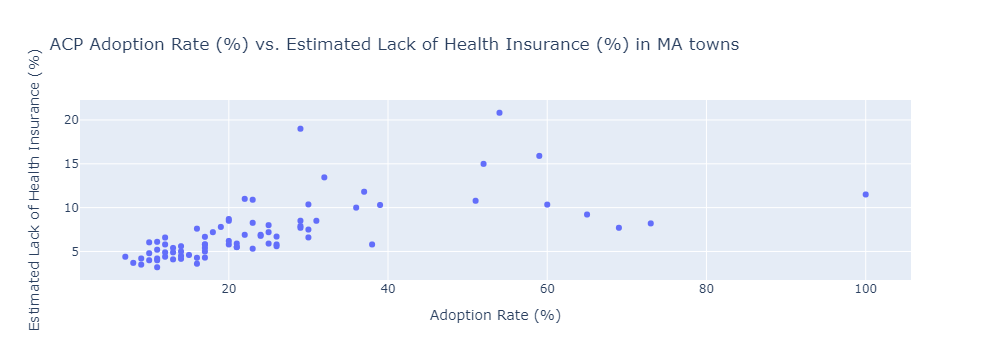

In [180]:
import plotly.express as px

#Plot ACP adoption percent by town vs. Estimated Percent of Individuals with a Lack of Health Insurance
fig = px.scatter(health_insurance_vs_acp_adoption, 
                 x="Adoption Rate (%)", 
                 y="Estimated Lack of Health Insurance (%)",
                 title="ACP Adoption Rate (%) vs. Estimated Lack of Health Insurance (%) in MA towns"
                )

fig.show()

<h2>Start using the Census Bureau API to scrape demographic data</h2>

In [181]:
social_char_estimates = pd.read_csv('noah_csv/social_char_estimates.csv')
social_char_estimates

,Unnamed: 0,Zip Code,Total Households,Population Over 25 With No High School Diploma,Population Over 25 With Associate Degree,Population Over 25 With Bachelor Degree,Population Over 25 With Graduate/Professional Degree,Households With Computer Access and Broadband Internet
0,0,1001,6791.0,694.0,1394.0,2808.0,1789.0,5781.0
1,1,1002,9985.0,153.0,689.0,3291.0,6527.0,9273.0
2,2,1003,15.0,0.0,46.0,1.0,32.0,10.0
3,3,1005,1761.0,16.0,276.0,642.0,647.0,1617.0
4,4,1007,5917.0,164.0,1328.0,2573.0,2524.0,5580.0
...,...,...,...,...,...,...,...,...
534,534,2777,6752.0,779.0,1461.0,2402.0,1532.0,5959.0
535,535,2779,2294.0,103.0,396.0,1347.0,662.0,2094.0
536,536,2780,20625.0,2920.0,3032.0,5890.0,2185.0,17168.0
537,537,2790,6667.0,709.0,1383.0,2041.0,1695.0,5907.0


In [182]:
def aggregate_health_data_acp(feature, return_graph=False):
    #Isolating one measure to intiallly use 
    feature_df = places_ma_pop[places_ma_pop["Measure"] == feature]
    feature_df = feature_df.drop(columns=["Measure", "Category", "ZCTA"])
    feature_df = feature_df.merge(ma_zips, left_on="Zip Code", right_on="Zip Code")
    aggregated_feature_df = feature_df.groupby('City').apply(weighted_average).reset_index()
    aggregated_feature_df.columns = ["City", feature]
    
    #Trim down aggregated_feature_df to the rows which contain towns from the superhighway dataset
    feature_df_acp = aggregated_feature_df[aggregated_feature_df["City"].isin(list(ma_acp_adoption["City"]))]
    
    #Merge datasets
    feature_vs_acp_adoption = feature_df_acp.merge(ma_acp_adoption, left_on="City", right_on="City")
    
    if return_graph:
        fig = px.scatter(feature_vs_acp_adoption, 
                 x="Adoption Rate (%)", 
                 y=feature,
                 title=f"ACP Adoption Rate (%) vs. {feature}"
                )
        fig.show()
        return feature_vs_acp_adoption
    else:
        return feature_vs_acp_adoption

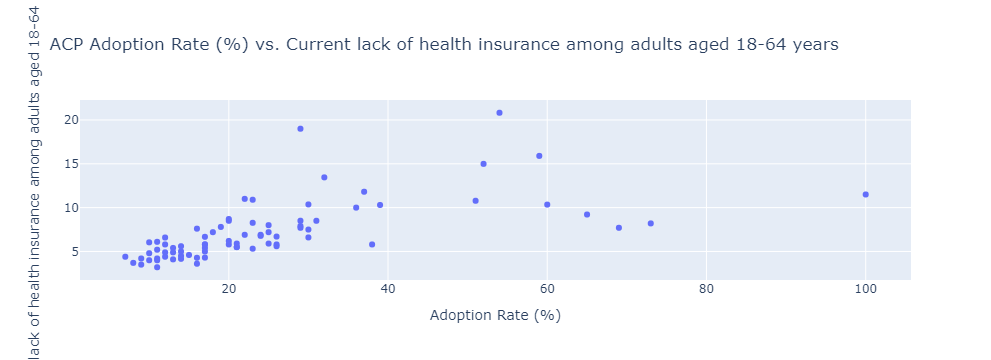

,City,Current lack of health insurance among adults aged 18-64 years,Adoption Rate (%),Eligible Households,Enrolled Households,Eligible Unconnected Households
0,Abington,5.800000,17,2169,376,448
1,Agawam,6.200000,20,5414,1069,2213
2,Amesbury,5.600000,26,1821,477,382
3,Arlington,4.160871,14,4816,651,925
4,Attleboro,7.200000,25,6110,1525,1392
...,...,...,...,...,...,...
72,Wilmington,5.200000,11,1975,225,403
73,Winchester,3.500000,9,1925,182,370
74,Winthrop,6.100000,11,4462,499,1586
75,Woburn,5.800000,17,4790,826,1069


In [183]:
aggregate_health_data_acp('Current lack of health insurance among adults aged 18-64 years', return_graph=True)

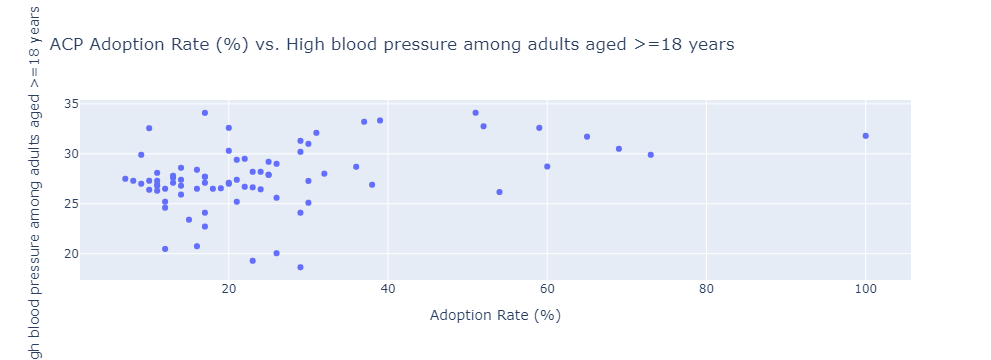

,City,High blood pressure among adults aged >=18 years,Adoption Rate (%),Eligible Households,Enrolled Households,Eligible Unconnected Households
0,Abington,27.700000,17,2169,376,448
1,Agawam,32.600000,20,5414,1069,2213
2,Amesbury,25.600000,26,1821,477,382
3,Arlington,25.917357,14,4816,651,925
4,Attleboro,29.200000,25,6110,1525,1392
...,...,...,...,...,...,...
72,Wilmington,26.900000,11,1975,225,403
73,Winchester,27.000000,9,1925,182,370
74,Winthrop,26.800000,11,4462,499,1586
75,Woburn,27.100000,17,4790,826,1069


In [184]:
aggregate_health_data_acp('High blood pressure among adults aged >=18 years', True)

<h1>Adding "Total Percent of Households Eligible" as a feature</h1>

In [185]:
ma_acp_adoption

,City,Adoption Rate (%),Eligible Households,Enrolled Households,Eligible Unconnected Households
0,Abington,17,2169,376,448
1,Agawam,20,5414,1069,2213
2,Amesbury,26,1821,477,382
3,Arlington,14,4816,651,925
4,Attleboro,25,6110,1525,1392
...,...,...,...,...,...
72,Wilmington,11,1975,225,403
73,Winchester,9,1925,182,370
74,Winthrop,11,4462,499,1586
75,Woburn,17,4790,826,1069


In [186]:
social_char_estimates

,Unnamed: 0,Zip Code,Total Households,Population Over 25 With No High School Diploma,Population Over 25 With Associate Degree,Population Over 25 With Bachelor Degree,Population Over 25 With Graduate/Professional Degree,Households With Computer Access and Broadband Internet
0,0,1001,6791.0,694.0,1394.0,2808.0,1789.0,5781.0
1,1,1002,9985.0,153.0,689.0,3291.0,6527.0,9273.0
2,2,1003,15.0,0.0,46.0,1.0,32.0,10.0
3,3,1005,1761.0,16.0,276.0,642.0,647.0,1617.0
4,4,1007,5917.0,164.0,1328.0,2573.0,2524.0,5580.0
...,...,...,...,...,...,...,...,...
534,534,2777,6752.0,779.0,1461.0,2402.0,1532.0,5959.0
535,535,2779,2294.0,103.0,396.0,1347.0,662.0,2094.0
536,536,2780,20625.0,2920.0,3032.0,5890.0,2185.0,17168.0
537,537,2790,6667.0,709.0,1383.0,2041.0,1695.0,5907.0


In [187]:
ma_zips

,Zip Code,City
0,01001,Agawam
1,01002,Amherst
2,01003,Amherst
3,01004,Amherst
4,01005,Barre
...,...,...
698,02783,Taunton
699,02790,Westport
700,02791,Westport Point
701,05501,Andover


In [188]:
#Clean social_char_estimates DF
social_char_estimates = social_char_estimates[[
    "Zip Code", 
    "Total Households",
    "Population Over 25 With No High School Diploma",
    "Population Over 25 With Associate Degree",
    "Population Over 25 With Bachelor Degree",
    "Population Over 25 With Graduate/Professional Degree",
    "Households With Computer Access and Broadband Internet"
    ]]
social_char_estimates["Zip Code"] = social_char_estimates["Zip Code"].map(clean_zip)
lack_of_broadband = (social_char_estimates["Total Households"] - social_char_estimates["Households With Computer Access and Broadband Internet"])
social_char_estimates["Lack of Broadband Access (%)"] = 100 * lack_of_broadband/social_char_estimates["Total Households"]
social_char_estimates

,Zip Code,Total Households,Population Over 25 With No High School Diploma,Population Over 25 With Associate Degree,Population Over 25 With Bachelor Degree,Population Over 25 With Graduate/Professional Degree,Households With Computer Access and Broadband Internet,Lack of Broadband Access (%)
0,01001,6791.0,694.0,1394.0,2808.0,1789.0,5781.0,14.872626
1,01002,9985.0,153.0,689.0,3291.0,6527.0,9273.0,7.130696
2,01003,15.0,0.0,46.0,1.0,32.0,10.0,33.333333
3,01005,1761.0,16.0,276.0,642.0,647.0,1617.0,8.177172
4,01007,5917.0,164.0,1328.0,2573.0,2524.0,5580.0,5.695454
...,...,...,...,...,...,...,...,...
534,02777,6752.0,779.0,1461.0,2402.0,1532.0,5959.0,11.744668
535,02779,2294.0,103.0,396.0,1347.0,662.0,2094.0,8.718396
536,02780,20625.0,2920.0,3032.0,5890.0,2185.0,17168.0,16.761212
537,02790,6667.0,709.0,1383.0,2041.0,1695.0,5907.0,11.399430


<h3>Here, we find that the social_char_estimates DF doesn't have a row for every zip code in ma_zips which means that some 5 digit zip codes may be unaccounted for and that could cause the eligibility percent to be lower than actual in some towns</h3>
<style>
    h1 {
    line-height: 3;
    }
</style>

In [189]:
finding_missing = ma_zips.merge(social_char_estimates, on='Zip Code', how='left')
finding_missing[np.isnan(finding_missing['Total Households'])][['Zip Code']]

,Zip Code
3,01004
12,01014
14,01021
31,01041
37,01059
...,...
685,02761
691,02768
698,02783
701,05501


In [190]:
def aggregate_health_data_broadband(feature, return_graph=False, show_fig=True):
    #Pulling the feature data
    feature_df = places_ma_pop[places_ma_pop["Measure"] == feature]
    feature_df = feature_df.drop(columns=["Category", "Measure"])
    
    #Merging on zip code in MA
    feature_df = feature_df[feature_df["ZCTA"].isin(ma_zips["Zip Code"])].drop(columns=["ZCTA"])
    feature_vs_broadband_access = feature_df.merge(social_char_estimates, left_on="Zip Code", right_on="Zip Code")
    feature_vs_broadband_access.rename(columns={"Data_Value": feature}, inplace=True)
    
    if return_graph:
        fig = px.scatter(feature_vs_broadband_access, 
                 x="Lack of Broadband Access (%)", 
                 y=feature,
                 title=f"Lack of Broadband Access (%) vs. {feature}"
                )
        if show_fig:
            fig.show()
        return feature_vs_broadband_access, fig
    else:
        return feature_vs_broadband_access

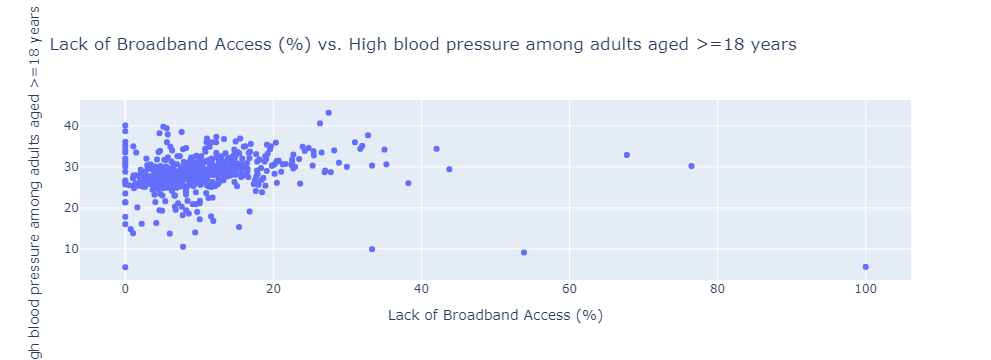

(     Year Zip Code   Data_Value_Type  \
 0    2019    01005  Crude prevalence   
 1    2019    01007  Crude prevalence   
 2    2019    01008  Crude prevalence   
 3    2019    01009  Crude prevalence   
 4    2019    01026  Crude prevalence   
 ..    ...      ...               ...   
 524  2019    01431  Crude prevalence   
 525  2019    02333  Crude prevalence   
 526  2019    01930  Crude prevalence   
 527  2019    01801  Crude prevalence   
 528  2019    01902  Crude prevalence   
 
      High blood pressure among adults aged >=18 years Confidence Interval  \
 0                                                29.1        (27.6, 30.6)   
 1                                                24.9        (23.8, 26.0)   
 2                                                31.1        (29.3, 32.7)   
 3                                                29.4        (28.0, 30.9)   
 4                                                29.5        (27.8, 31.3)   
 ..                                   

In [191]:
aggregate_health_data_broadband('High blood pressure among adults aged >=18 years', return_graph=True)

<h1>Transitioning to more granular data</h1>
<h2>Found a Data Set providing ACP enrollment and eligibility by 5 digit zip code.</h2>
<p>Source:</p><a href="https://www.benton.org/acp_tool">Benston Institute for Broadband & Society</a>

In [192]:
acp_enrollment_by_zip = pd.read_csv('noah_csv/acp_enrollment_by_zip.csv')
acp_enrollment_by_zip

,Zip Code,Performance Category,Actual ACP Enrollment,Predicted ACP enrollment,Claimed ACP subscribers,Total Support (in dollars),Total Households,Eligible Households,Wireline Broadband,Cellular Data Only,No Computer,"Income $15,000 or less",Rent Burdened,Population Age 65+,Share of population foreign born,State Code
0,1013,HIGHEST,3451,1890,2886,96044,9375,5738,66%,19%,10%,14%,49%,16%,11%,25
1,1032,HIGHEST,19,6,18,540,198,40,59%,5%,2%,7%,20%,26%,0%,25
2,1072,HIGHEST,38,19,4,220,609,145,63%,7%,5%,4%,47%,25%,4%,25
3,1096,HIGHEST,51,23,17,660,1058,180,70%,5%,4%,5%,43%,24%,4%,25
4,1201,HIGHEST,5432,2736,4651,149332,19952,9836,76%,8%,9%,9%,57%,20%,7%,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25491,99820,LOWEST,16,29,13,965,157,110,38%,21%,17%,17%,72%,19%,0%,2
25492,99829,LOWEST,13,28,10,350,275,179,20%,17%,11%,6%,20%,19%,5%,2
25493,99901,LOWEST,276,433,243,15868,5487,2108,76%,10%,6%,7%,52%,16%,9%,2
25494,99919,LOWEST,7,28,4,120,263,149,23%,9%,19%,19%,29%,23%,3%,2


In [193]:
acp_enrollment_by_zip["Zip Code"] = acp_enrollment_by_zip["Zip Code"].map(clean_zip)
acp_enrollment_by_zip

,Zip Code,Performance Category,Actual ACP Enrollment,Predicted ACP enrollment,Claimed ACP subscribers,Total Support (in dollars),Total Households,Eligible Households,Wireline Broadband,Cellular Data Only,No Computer,"Income $15,000 or less",Rent Burdened,Population Age 65+,Share of population foreign born,State Code
0,01013,HIGHEST,3451,1890,2886,96044,9375,5738,66%,19%,10%,14%,49%,16%,11%,25
1,01032,HIGHEST,19,6,18,540,198,40,59%,5%,2%,7%,20%,26%,0%,25
2,01072,HIGHEST,38,19,4,220,609,145,63%,7%,5%,4%,47%,25%,4%,25
3,01096,HIGHEST,51,23,17,660,1058,180,70%,5%,4%,5%,43%,24%,4%,25
4,01201,HIGHEST,5432,2736,4651,149332,19952,9836,76%,8%,9%,9%,57%,20%,7%,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25491,99820,LOWEST,16,29,13,965,157,110,38%,21%,17%,17%,72%,19%,0%,2
25492,99829,LOWEST,13,28,10,350,275,179,20%,17%,11%,6%,20%,19%,5%,2
25493,99901,LOWEST,276,433,243,15868,5487,2108,76%,10%,6%,7%,52%,16%,9%,2
25494,99919,LOWEST,7,28,4,120,263,149,23%,9%,19%,19%,29%,23%,3%,2


In [194]:
zip_to_zcta = pd.read_excel("ani_csv/ZIPCodetoZCTACrosswalk2021UDS.xlsx")

In [195]:
zip_to_zcta["Zip Code"] = zip_to_zcta["ZIP_CODE"].astype(int).map(clean_zip)
zip_to_zcta["zcta"] = zip_to_zcta["ZCTA"].fillna("00000").astype(int).map(clean_zip)
zip_to_zcta = zip_to_zcta[["Zip Code", "zcta"]]
zip_to_zcta

,Zip Code,zcta
0,00501,11742
1,00544,11742
2,00601,00601
3,00602,00602
4,00603,00603
...,...,...
41086,99926,99926
41087,99927,99927
41088,99928,99901
41089,99929,99929


In [200]:
zip_to_zcta.value_counts("Zip Code")

Zip Code
00501    1
64453    1
64153    1
64154    1
64155    1
        ..
33055    1
33056    1
33060    1
33061    1
99950    1
Length: 41091, dtype: int64

In [201]:
acp_enrollment_with_zcta.value_counts("Zip Code")

Zip Code
01001    1
62534    1
62531    1
62530    1
62526    1
        ..
33412    1
33411    1
33410    1
33409    1
99929    1
Length: 25496, dtype: int64

In [196]:
acp_enrollment_with_zcta = zip_to_zcta.merge(acp_enrollment_with_zcta, left_on="Zip Code", right_on="Zip Code")
acp_enrollment_with_zcta

,Zip Code,zcta,zcta_x,Performance Category,Actual ACP Enrollment,Predicted ACP enrollment,Claimed ACP subscribers,Total Support (in dollars),Total Households,Eligible Households,Population Age 65+,State Code,zcta_y,Raw Wireline Broadband,Raw Cellular Data Only,Raw No Computer,"Raw Income $15,000 or less",Raw Rent Burdened,Raw Share of population foreign born
0,01001,01001,01001,MEDIUM,646,593,152,6560,6791,2078,22%,25,01001,4617.88,1086.56,679.10,543.28,3055.95,679.10
1,01002,01002,01002,LOWEST,660,1337,134,4995,9985,6620,13%,25,01002,8587.10,599.10,299.55,1597.60,6490.25,1997.00
2,01005,01005,01005,HIGH,191,147,159,5735,1761,539,13%,25,01005,1215.09,193.71,123.27,70.44,0.00,52.83
3,01007,01007,01007,HIGH,503,307,427,14014,5917,1207,17%,25,01007,4970.28,532.53,177.51,355.02,2662.65,295.85
4,01008,01008,01008,HIGH,25,16,22,760,506,129,26%,25,01008,182.16,166.98,30.36,5.06,0.00,15.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25491,99919,99919,99919,LOWEST,7,28,4,120,263,149,23%,2,99919,60.49,23.67,49.97,49.97,76.27,7.89
25492,99921,99921,99921,LOW,57,72,55,3834,822,371,19%,2,99921,419.22,82.20,98.64,98.64,361.68,24.66
25493,99925,99925,99925,LOWEST,19,34,18,1204,345,202,16%,2,99925,41.40,48.30,51.75,41.40,110.40,6.90
25494,99926,99926,99926,HIGH,104,70,102,7249,457,305,15%,2,99926,228.50,59.41,54.84,36.56,137.10,4.57


In [197]:
acp_enrollment_with_zcta.value_counts("zcta")

zcta
01001    1
62534    1
62531    1
62530    1
62526    1
        ..
33412    1
33411    1
33410    1
33409    1
99929    1
Length: 25496, dtype: int64

<h3>Comparing ACP Eligibility by Town to Lack of Broadband by Town as a Percent</h3>

In [202]:
acp_enrollment_with_zcta.value_counts("zcta")

zcta
01001    1
62534    1
62531    1
62530    1
62526    1
        ..
33412    1
33411    1
33410    1
33409    1
99929    1
Length: 25496, dtype: int64

In [204]:
#Filtering the social_char_estimates data set
social_char_ma_filtered = social_char_estimates[social_char_estimates["Zip Code"].isin(list(acp_enrollment_ma_filtered["zcta"]))]
social_char_ma_filtered

,Zip Code,Total Households,Population Over 25 With No High School Diploma,Population Over 25 With Associate Degree,Population Over 25 With Bachelor Degree,Population Over 25 With Graduate/Professional Degree,Households With Computer Access and Broadband Internet,Lack of Broadband Access (%)
0,01001,6791.0,694.0,1394.0,2808.0,1789.0,5781.0,14.872626
1,01002,9985.0,153.0,689.0,3291.0,6527.0,9273.0,7.130696
3,01005,1761.0,16.0,276.0,642.0,647.0,1617.0,8.177172
4,01007,5917.0,164.0,1328.0,2573.0,2524.0,5580.0,5.695454
5,01008,506.0,60.0,128.0,168.0,137.0,392.0,22.529644
...,...,...,...,...,...,...,...,...
533,02771,5969.0,611.0,1016.0,2814.0,2148.0,5458.0,8.560898
534,02777,6752.0,779.0,1461.0,2402.0,1532.0,5959.0,11.744668
535,02779,2294.0,103.0,396.0,1347.0,662.0,2094.0,8.718396
536,02780,20625.0,2920.0,3032.0,5890.0,2185.0,17168.0,16.761212


In [205]:
#Calculate percentages for the acp_enrollment data set
acp_enrollment_ma_filtered["ACP Eligibility (%)"] = acp_enrollment_ma_filtered["Eligible Households"]/acp_enrollment_ma_filtered["Total Households"]
acp_enrollment_ma_filtered

,Zip Code,Performance Category,Actual ACP Enrollment,Predicted ACP enrollment,Claimed ACP subscribers,Total Support (in dollars),Total Households,Eligible Households,Wireline Broadband,Cellular Data Only,No Computer,"Income $15,000 or less",Rent Burdened,Population Age 65+,Share of population foreign born,State Code,zcta,ACP Eligibility (%)
0,01013,HIGHEST,3451,1890,2886,96044,9375,5738,66%,19%,10%,14%,49%,16%,11%,25,01013,0.612053
1,01032,HIGHEST,19,6,18,540,198,40,59%,5%,2%,7%,20%,26%,0%,25,01032,0.202020
2,01072,HIGHEST,38,19,4,220,609,145,63%,7%,5%,4%,47%,25%,4%,25,01072,0.238095
3,01096,HIGHEST,51,23,17,660,1058,180,70%,5%,4%,5%,43%,24%,4%,25,01096,0.170132
4,01201,HIGHEST,5432,2736,4651,149332,19952,9836,76%,8%,9%,9%,57%,20%,7%,25,01201,0.492983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18321,02764,LOWEST,79,119,12,460,1560,398,89%,6%,4%,1%,9%,14%,3%,25,02764,0.255128
18322,02767,LOWEST,325,510,63,2990,5550,1415,85%,5%,5%,9%,74%,18%,10%,25,02767,0.254955
18323,02769,LOWEST,131,253,23,790,4377,1042,82%,10%,2%,4%,52%,18%,6%,25,02769,0.238063
18324,02770,LOWEST,46,75,9,470,2032,207,91%,4%,4%,2%,4%,17%,4%,25,02770,0.101870


In [220]:
acp_vs_broadband_ma = acp_enrollment_ma_filtered[["Zip Code", 
                                                  "Actual ACP Enrollment", 
                                                  "Claimed ACP subscribers",
                                                  "Total Support (in dollars)",
                                                  "Total Households",
                                                  "Eligible Households",
                                                  "Wireline Broadband",
                                                  "Cellular Data Only",
                                                  "ACP Eligibility (%)",
                                                  "zcta"
                                                 ]].merge(social_char_ma_filtered[["Zip Code",
                                                                                  "Households With Computer Access and Broadband Internet",
                                                                                 ]], on="Zip Code")
acp_vs_broadband_ma

,Zip Code,Actual ACP Enrollment,Claimed ACP subscribers,Total Support (in dollars),Total Households,Eligible Households,Wireline Broadband,Cellular Data Only,ACP Eligibility (%),zcta,Households With Computer Access and Broadband Internet
0,01013,3451,2886,96044,9375,5738,66%,19%,0.612053,01013,8061.0
1,01032,19,18,540,198,40,59%,5%,0.202020,01032,167.0
2,01072,38,4,220,609,145,63%,7%,0.238095,01072,537.0
3,01096,51,17,660,1058,180,70%,5%,0.170132,01096,871.0
4,01201,5432,4651,149332,19952,9836,76%,8%,0.492983,01201,17119.0
...,...,...,...,...,...,...,...,...,...,...,...
470,02764,79,12,460,1560,398,89%,6%,0.255128,02764,1502.0
471,02767,325,63,2990,5550,1415,85%,5%,0.254955,02767,5006.0
472,02769,131,23,790,4377,1042,82%,10%,0.238063,02769,4102.0
473,02770,46,9,470,2032,207,91%,4%,0.101870,02770,1940.0


In [221]:
acp_vs_broadband_ma.sort_values("Zip Code")

,Zip Code,Actual ACP Enrollment,Claimed ACP subscribers,Total Support (in dollars),Total Households,Eligible Households,Wireline Broadband,Cellular Data Only,ACP Eligibility (%),zcta,Households With Computer Access and Broadband Internet
157,01001,646,152,6560,6791,2078,68%,16%,0.305993,01001,5781.0
355,01002,660,134,4995,9985,6620,86%,6%,0.662994,01002,9273.0
59,01005,191,159,5735,1761,539,69%,11%,0.306076,01005,1617.0
60,01007,503,427,14014,5917,1207,84%,9%,0.203989,01007,5580.0
61,01008,25,22,760,506,129,36%,33%,0.254941,01008,392.0
...,...,...,...,...,...,...,...,...,...,...,...
474,02771,242,39,1670,5969,1218,83%,6%,0.204054,02771,5458.0
352,02777,443,104,4270,6752,1492,80%,7%,0.220972,02777,5959.0
353,02779,107,26,1080,2294,546,86%,4%,0.238012,02779,2094.0
354,02780,2761,979,39670,20625,10519,73%,9%,0.510012,02780,17168.0


In [222]:
#

In [223]:
no_broadband = acp_vs_broadband_ma["Total Households"] - acp_vs_broadband_ma["Households With Computer Access and Broadband Internet"]
acp_vs_broadband_ma["Lack of Broadband Internet Access (%)"] = no_broadband/acp_vs_broadband_ma["Total Households"]
acp_vs_broadband_ma["Broadband Internet Access (%)"] = acp_vs_broadband_ma["Households With Computer Access and Broadband Internet"]/acp_vs_broadband_ma["Total Households"]
acp_vs_broadband_ma

,Zip Code,Actual ACP Enrollment,Claimed ACP subscribers,Total Support (in dollars),Total Households,Eligible Households,Wireline Broadband,Cellular Data Only,ACP Eligibility (%),zcta,Households With Computer Access and Broadband Internet,Lack of Broadband Internet Access (%),Broadband Internet Access (%)
0,01013,3451,2886,96044,9375,5738,66%,19%,0.612053,01013,8061.0,0.140160,0.859840
1,01032,19,18,540,198,40,59%,5%,0.202020,01032,167.0,0.156566,0.843434
2,01072,38,4,220,609,145,63%,7%,0.238095,01072,537.0,0.118227,0.881773
3,01096,51,17,660,1058,180,70%,5%,0.170132,01096,871.0,0.176749,0.823251
4,01201,5432,4651,149332,19952,9836,76%,8%,0.492983,01201,17119.0,0.141991,0.858009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,02764,79,12,460,1560,398,89%,6%,0.255128,02764,1502.0,0.037179,0.962821
471,02767,325,63,2990,5550,1415,85%,5%,0.254955,02767,5006.0,0.098018,0.901982
472,02769,131,23,790,4377,1042,82%,10%,0.238063,02769,4102.0,0.062828,0.937172
473,02770,46,9,470,2032,207,91%,4%,0.101870,02770,1940.0,0.045276,0.954724


In [224]:
acp_vs_broadband_ma["Under-Eligible"] = acp_vs_broadband_ma["ACP Eligibility (%)"] < acp_vs_broadband_ma["Lack of Broadband Internet Access (%)"]

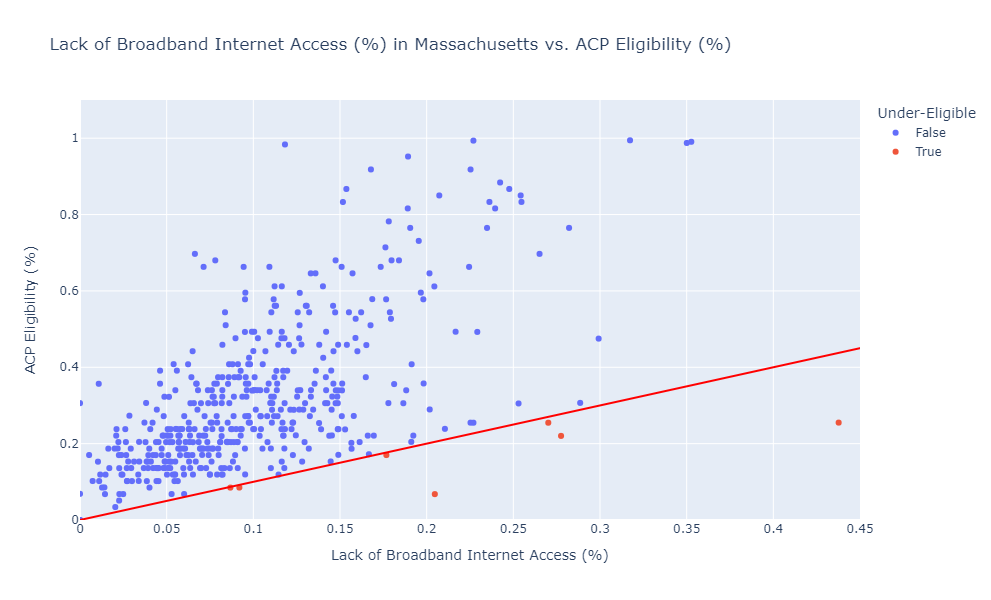

In [225]:
# Create scatter plot
fig = px.scatter(acp_vs_broadband_ma, 
                 x="Lack of Broadband Internet Access (%)", 
                 y="ACP Eligibility (%)", 
                 color="Under-Eligible", 
                 title="Lack of Broadband Internet Access (%) in Massachusetts vs. ACP Eligibility (%)")

# Add a line with a slope of 1
fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=1, y1=1,
        line=dict(color='Red'),
)

fig.update_xaxes(range=[0, 0.45])
fig.update_yaxes(range=[0, 1.1])
fig.update_layout(height=600)

# Show the plot
fig.show()

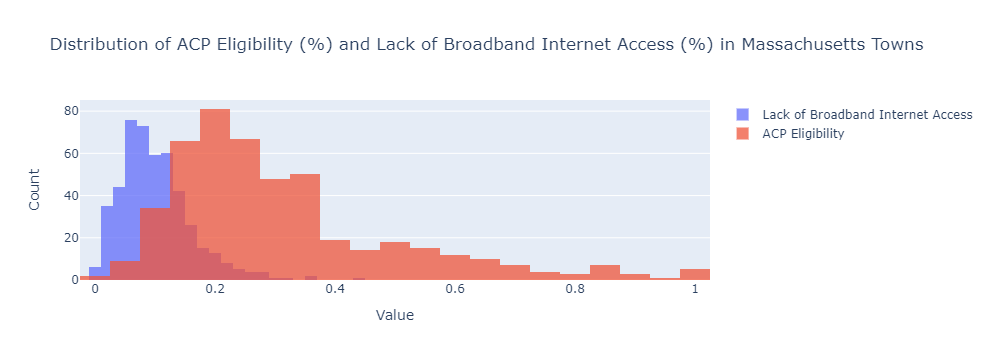

In [226]:
import plotly.graph_objects as go

# And the columns are named "Broadband Internet Access (%)" and "ACP Eligibility (%)"

# Create histograms
hist_broadband = go.Histogram(
    x=acp_vs_broadband_ma['Lack of Broadband Internet Access (%)'],
    opacity=0.75,
    name='Lack of Broadband Internet Access'
)

hist_acp = go.Histogram(
    x=acp_vs_broadband_ma['ACP Eligibility (%)'],
    opacity=0.75,
    name='ACP Eligibility'
)

# Create the figure and add the histograms
fig = go.Figure()
fig.add_trace(hist_broadband)
fig.add_trace(hist_acp)

# Update layout for better appearance
fig.update_layout(
    barmode='overlay', # Overlay the histograms
    xaxis_title='Value',
    yaxis_title='Count',
    title='Distribution of ACP Eligibility (%) and Lack of Broadband Internet Access (%) in Massachusetts Towns',
)

# Show the plot
fig.show()


In [227]:
import geopandas as gpd
import os

# Reading the shapefile
zip_code_geometries = gpd.read_file("noah_csv/ZIPCODES_NT_POLY.shp")

# Displaying the first few rows of the shapefile to understand its structure
zip_code_geometries.head()

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
0,01331,ATHOL,NON UNIQUE,ATHOL,02515,"ATHOL, TOWN OF",WORCESTER,58.084870,1.504391e+08,66459.581259,"POLYGON ((147583.601 930766.133, 147572.846 93..."
1,01085,WESTFIELD,NON UNIQUE,WESTFIELD,76030,WESTFIELD,HAMPDEN,55.938928,1.448812e+08,61329.577100,"POLYGON ((101952.244 882113.238, 101989.263 88..."
2,01370,SHELBURNE FALLS,NON UNIQUE,SHELBURNE FALLS,61205,"SHELBURNE, TOWN OF",FRANKLIN,48.804057,1.264019e+08,70885.011312,"POLYGON ((107090.967 933358.562, 106787.233 93..."
3,01235,HINSDALE,NON UNIQUE,HINSDALE,30280,"HINSDALE, TOWN OF",BERKSHIRE,47.757052,1.236902e+08,49286.404925,"POLYGON ((77728.642 914027.911, 77229.987 9120..."
4,02747,NORTH DARTMOUTH,NON UNIQUE,NORTH DARTMOUTH,47450,"DARTMOUTH, TOWN OF",BRISTOL,47.495414,1.230126e+08,66614.835420,"POLYGON ((242894.990 830521.900, 242901.505 83..."


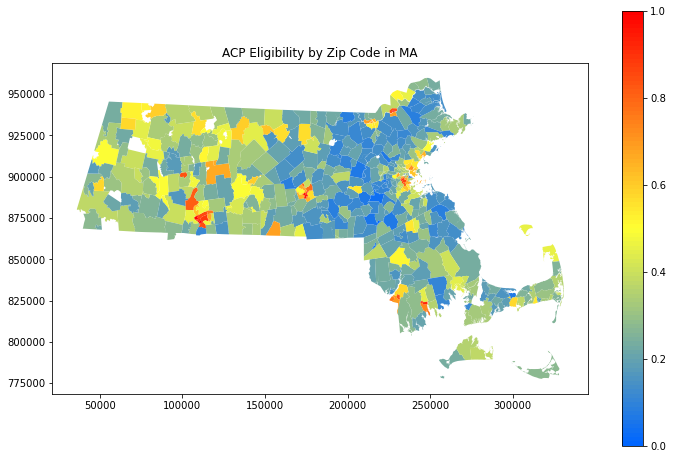

In [228]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define custom colormap
colors = [(0, 0.4, 1), (1, 1, 0.2), (1, 0, 0)]  # Blue, Yellow, Red
cmap_name = 'custom'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)
norm_bins = plt.Normalize(vmin=0, vmax=1)

# Merging the ACP eligibility data with the zip code geometries data
acp_vs_broadband_ma['Zip Code'] = acp_vs_broadband_ma["Zip Code"].astype(str)
zip_code_geometries['POSTCODE'] = zip_code_geometries['POSTCODE'].astype(str)
merged_data = zip_code_geometries.merge(acp_vs_broadband_ma, left_on='POSTCODE', right_on='Zip Code')

# Plotting the heatmap using the 'ACP Eligibility (%)' column with custom colormap
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data.plot(column='ACP Eligibility (%)', cmap=custom_cmap, linewidth=0, ax=ax, edgecolor='0.8', norm=norm_bins, legend=True)
plt.title('ACP Eligibility by Zip Code in MA')
plt.show()


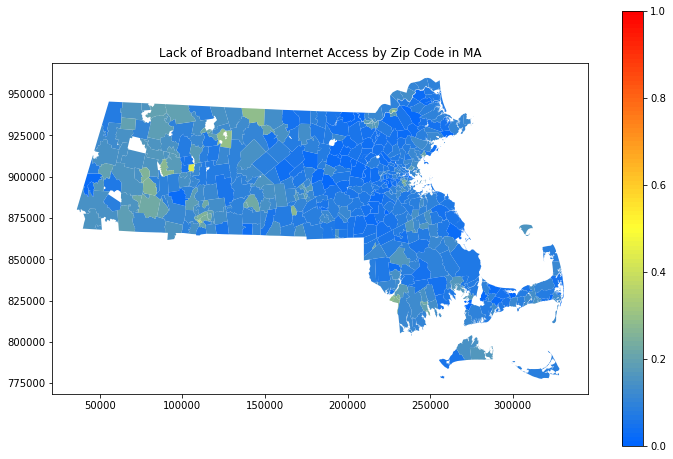

In [229]:
# Define custom colormap
colors = [(0, 0.4, 1), (1, 1, 0.2), (1, 0, 0)]  # Blue, Yellow, Red
cmap_name = 'custom'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)
norm_bins = plt.Normalize(vmin=0, vmax=1)

# Merging the ACP eligibility data with the zip code geometries data
acp_vs_broadband_ma['Zip Code'] = acp_vs_broadband_ma["Zip Code"].astype(str)
zip_code_geometries['POSTCODE'] = zip_code_geometries['POSTCODE'].astype(str)
merged_data = zip_code_geometries.merge(acp_vs_broadband_ma, left_on='POSTCODE', right_on='Zip Code')

# Plotting the heatmap using the 'ACP Eligibility (%)' column with custom colormap
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data.plot(column='Lack of Broadband Internet Access (%)', cmap=custom_cmap, linewidth=0, ax=ax, edgecolor='0.8', norm=norm_bins, legend=True)
plt.title('Lack of Broadband Internet Access by Zip Code in MA')
plt.show()

In [230]:
from sklearn.linear_model import LinearRegression

In [231]:
demographic_estimates = pd.read_csv("noah_csv/demographic_estimates.csv")
demographic_estimates

,Unnamed: 0,ZCTA,Population Under 18,Population Over 18,Population Over 65,Total White Population,Total Black or African American Population,Total Native American Population,Total Asian Population,Total Native Hawaiian and Pacific Islander Population,Total Hispanic or Latino Population,Total Citizens over 18
0,0,1001,2797,13291,3613,14434,596,0,591,0,689,12861
1,1,1002,3599,23724,3561,20141,1643,24,2623,132,2059,21231
2,2,1003,189,13522,5,9173,766,39,2570,0,1298,12121
3,3,1005,882,4065,661,4768,22,0,0,0,171,3986
4,4,1007,3119,12185,2527,14051,52,0,491,0,617,12079
...,...,...,...,...,...,...,...,...,...,...,...,...
534,534,2777,3170,13850,3584,15930,116,81,255,0,90,13728
535,535,2779,1583,5141,918,6481,20,0,0,0,4,4994
536,536,2780,11705,40206,7742,40678,3634,124,942,0,4434,38144
537,537,2790,2644,13593,3900,15827,8,0,29,0,242,13489


In [234]:
demographic_estimates["zcta"] = demographic_estimates["ZCTA"].map(clean_zip)

In [235]:
acp_vs_broadband_ma

,Zip Code,Actual ACP Enrollment,Claimed ACP subscribers,Total Support (in dollars),Total Households,Eligible Households,Wireline Broadband,Cellular Data Only,ACP Eligibility (%),zcta,Households With Computer Access and Broadband Internet,Lack of Broadband Internet Access (%),Broadband Internet Access (%),Under-Eligible
0,01013,3451,2886,96044,9375,5738,66%,19%,0.612053,01013,8061.0,0.140160,0.859840,False
1,01032,19,18,540,198,40,59%,5%,0.202020,01032,167.0,0.156566,0.843434,False
2,01072,38,4,220,609,145,63%,7%,0.238095,01072,537.0,0.118227,0.881773,False
3,01096,51,17,660,1058,180,70%,5%,0.170132,01096,871.0,0.176749,0.823251,True
4,01201,5432,4651,149332,19952,9836,76%,8%,0.492983,01201,17119.0,0.141991,0.858009,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,02764,79,12,460,1560,398,89%,6%,0.255128,02764,1502.0,0.037179,0.962821,False
471,02767,325,63,2990,5550,1415,85%,5%,0.254955,02767,5006.0,0.098018,0.901982,False
472,02769,131,23,790,4377,1042,82%,10%,0.238063,02769,4102.0,0.062828,0.937172,False
473,02770,46,9,470,2032,207,91%,4%,0.101870,02770,1940.0,0.045276,0.954724,False


In [237]:
master_feature_df = acp_vs_broadband_ma.merge(demographic_estimates, left_on="zcta", right_on="zcta")
master_feature_df

,Zip Code,Actual ACP Enrollment,Claimed ACP subscribers,Total Support (in dollars),Total Households,Eligible Households,Wireline Broadband,Cellular Data Only,ACP Eligibility (%),zcta,...,Population Under 18,Population Over 18,Population Over 65,Total White Population,Total Black or African American Population,Total Native American Population,Total Asian Population,Total Native Hawaiian and Pacific Islander Population,Total Hispanic or Latino Population,Total Citizens over 18
0,01013,3451,2886,96044,9375,5738,66%,19%,0.612053,01013,...,4963,17746,3679,16916,1023,4,507,0,7206,16900
1,01032,19,18,540,198,40,59%,5%,0.202020,01032,...,62,368,110,426,0,0,0,0,4,368
2,01072,38,4,220,609,145,63%,7%,0.238095,01072,...,194,1180,347,1234,12,0,11,0,113,1177
3,01096,51,17,660,1058,180,70%,5%,0.170132,01096,...,359,2054,586,2379,0,14,1,0,53,2038
4,01201,5432,4651,149332,19952,9836,76%,8%,0.492983,01201,...,7966,37406,8959,37953,2301,98,607,17,3476,36421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,02764,79,12,460,1560,398,89%,6%,0.255128,02764,...,851,3621,610,4167,27,0,0,0,58,3612
471,02767,325,63,2990,5550,1415,85%,5%,0.254955,02767,...,3296,11959,2702,12937,948,0,354,0,421,11746
472,02769,131,23,790,4377,1042,82%,10%,0.238063,02769,...,2508,9926,2179,12052,11,0,84,0,435,9593
473,02770,46,9,470,2032,207,91%,4%,0.101870,02770,...,1267,4435,960,5611,12,0,0,0,25,4425


In [239]:
master_feature_df["Bias"] = 1
master_feature_df

,Zip Code,Actual ACP Enrollment,Claimed ACP subscribers,Total Support (in dollars),Total Households,Eligible Households,Wireline Broadband,Cellular Data Only,ACP Eligibility (%),zcta,...,Population Over 18,Population Over 65,Total White Population,Total Black or African American Population,Total Native American Population,Total Asian Population,Total Native Hawaiian and Pacific Islander Population,Total Hispanic or Latino Population,Total Citizens over 18,Bias
0,01013,3451,2886,96044,9375,5738,66%,19%,0.612053,01013,...,17746,3679,16916,1023,4,507,0,7206,16900,1
1,01032,19,18,540,198,40,59%,5%,0.202020,01032,...,368,110,426,0,0,0,0,4,368,1
2,01072,38,4,220,609,145,63%,7%,0.238095,01072,...,1180,347,1234,12,0,11,0,113,1177,1
3,01096,51,17,660,1058,180,70%,5%,0.170132,01096,...,2054,586,2379,0,14,1,0,53,2038,1
4,01201,5432,4651,149332,19952,9836,76%,8%,0.492983,01201,...,37406,8959,37953,2301,98,607,17,3476,36421,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,02764,79,12,460,1560,398,89%,6%,0.255128,02764,...,3621,610,4167,27,0,0,0,58,3612,1
471,02767,325,63,2990,5550,1415,85%,5%,0.254955,02767,...,11959,2702,12937,948,0,354,0,421,11746,1
472,02769,131,23,790,4377,1042,82%,10%,0.238063,02769,...,9926,2179,12052,11,0,84,0,435,9593,1
473,02770,46,9,470,2032,207,91%,4%,0.101870,02770,...,4435,960,5611,12,0,0,0,25,4425,1


In [240]:
def clean_percent(percent):
    return int(percent[0:-1]) * 0.01

clean_percent("67%")

0.67